In [2]:
import scanpy as sc
# adata = sc.read_h5ad('/zhupengfei/STExperiment/Data/GraphST/7.Mouse_Breast_Cancer_Sample_1/filtered_feature_bc_matrix.h5ad')
adata = sc.read_h5ad('/zhupengfei/STExperiment/Data/GraphST/6.Mouse_Hippocampus_Tissue/filtered_feature_bc_matrix_200115_08.h5ad')
adata

AnnData object with n_obs × n_vars = 53208 × 23264
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [3]:
import pandas as pd
#label
label_fold = '/zhupengfei/STExperiment/MAEST/results/Mouse_HT/'
#加载聚类标签
df_label = pd.read_csv(label_fold + '/549label.txt', sep=',', index_col=0)
# print(df_label.head())
label = df_label['domain']
adata.obs['domain'] = label.values.astype(str)
adata

AnnData object with n_obs × n_vars = 53208 × 23264
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'domain'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

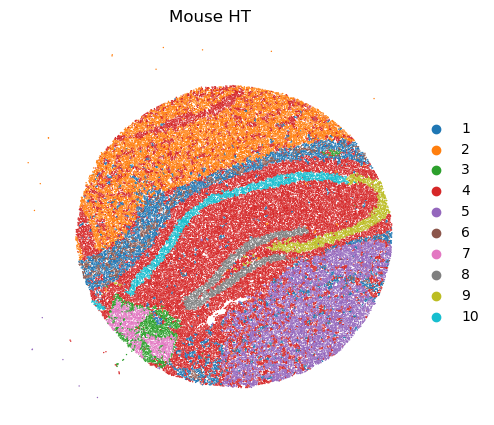

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

sc.pl.embedding(adata, 
                basis="spatial", 
                color="domain",
                s=4, 
                show=False, 
                title='Mouse HT',
                ax=ax
                )
plt.axis('off')

In [10]:
# 运行 rank_genes_groups 函数  
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, groupby='domain', method='wilcoxon', key_added='rank_genes_res') 

/opt/conda/envs/STexp/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
# 查看所有细胞类型的 marker 基因  
markers = adata.uns['rank_genes_res'] 
markers

{'params': {'groupby': 'domain',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Plp1', 'Nrgn', 'Nnat', 'Ddn', 'Pcp4', 'Plp1', 'Ttr', 'Ppp3ca', 'Hpca', 'Hpca'),
            ('Mbp', 'Snap25', 'Calb2', 'Camk2a', 'Prkcd', 'Mbp', 'Cd63', 'Ncdn', 'Chgb', 'Tmsb4x'),
            ('Mobp', 'Camk2n1', 'Necab2', 'Cabp7', 'Rora', 'Mobp', 'Zic1', 'Olfm1', 'Snap25', 'Ppp3ca'),
            ...,
            ('mt-Nd4', 'Zbtb20', 'Hpca', 'Calm2', 'Hpca', 'mt-Nd2', 'Ddn', 'Mobp', 'Tcf7l2', 'Atp1a2'),
            ('Camk2a', 'Zic1', 'Slc1a2', 'Snap25', 'Ddn', 'Camk2a', 'Slc1a2', 'Mbp', 'Mobp', 'Mobp'),
            ('mt-Nd1', 'Sparc', 'Camk2a', 'Malat1', 'Nrgn', 'mt-Nd1', 'Camk2a', 'Kif5a', 'Mbp', 'Mbp')],
           dtype=[('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O'), ('10', 'O')]),
 'scores': rec.array([( 64.4596 ,  61.526455,  29.562025,  24.4448

In [26]:
marker_10=markers['names']['7'][:10]
marker_10

array(['Ttr', 'Cd63', 'Zic1', 'Enpp2', 'Mdh1', 'Dbi', 'Necab2', 'Gabbr1',
       'Gnas', 'Nwd2'], dtype=object)

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

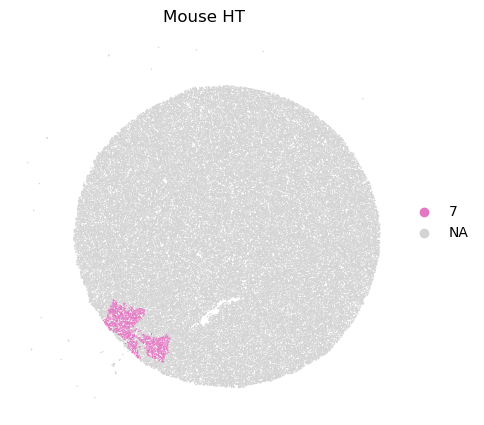

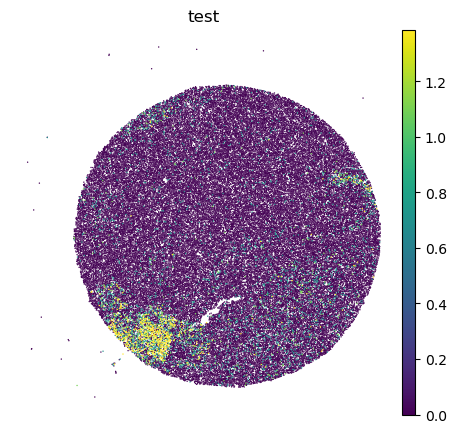

In [32]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['7'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='Necab2',
                s=4, 
                show=False, 
                title='test',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

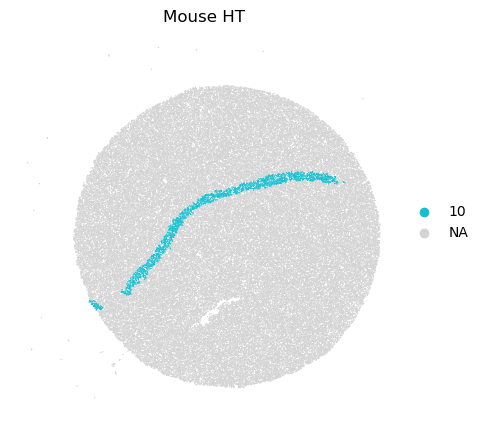

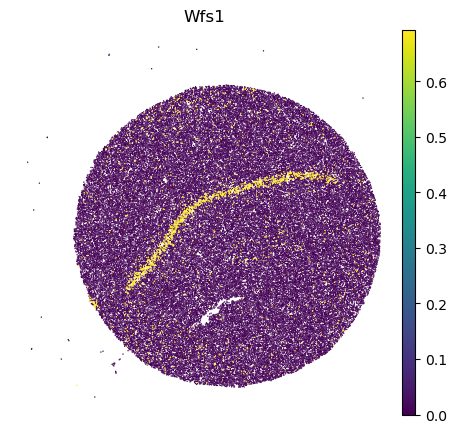

In [33]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['10'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='Wfs1',
                s=4, 
                show=False, 
                title='Wfs1',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')


/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

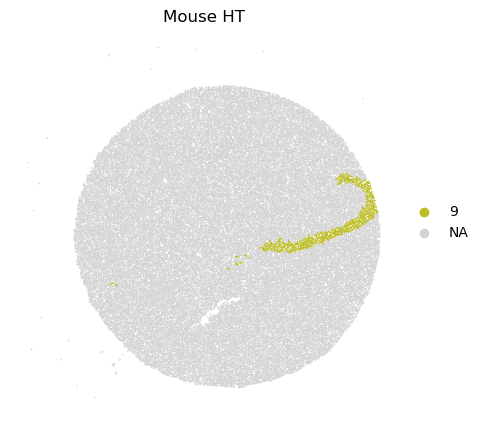

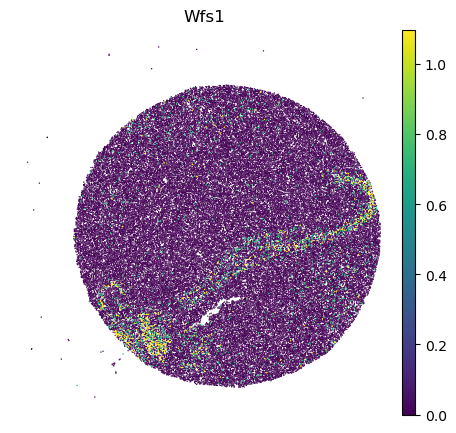

In [36]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['9'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='Cpne4',
                s=4, 
                show=False, 
                title='Wfs1',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

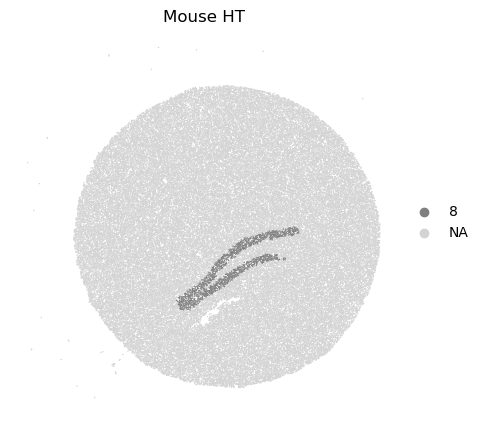

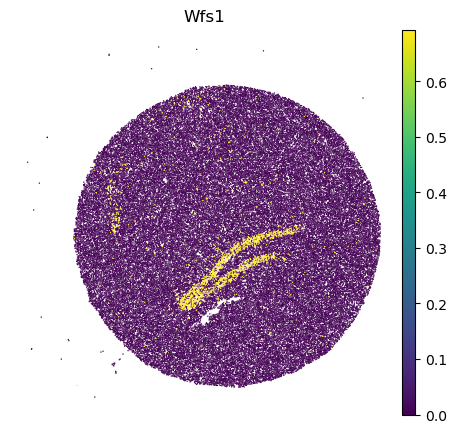

In [37]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['8'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='C1ql2',
                s=4, 
                show=False, 
                title='Wfs1',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

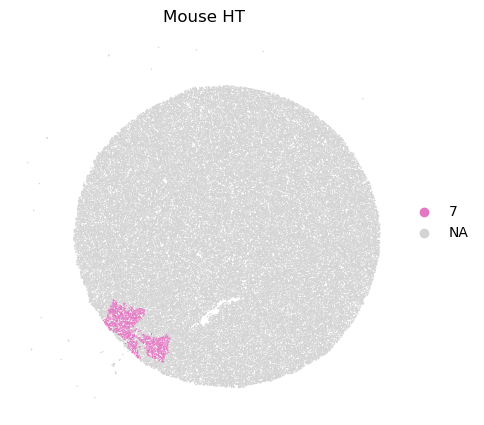

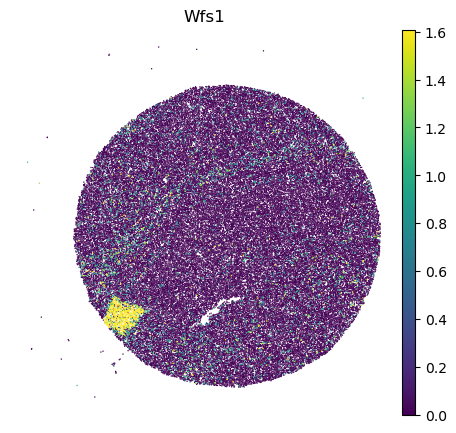

In [39]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['7'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')
# plt.savefig("./results/" + datatype + "/" + ".png")

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='Enpp2',
                s=4, 
                show=False, 
                title='Wfs1',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')

/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/envs/STexp/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-119.124, 5960.444, -6031.482, 125.922)

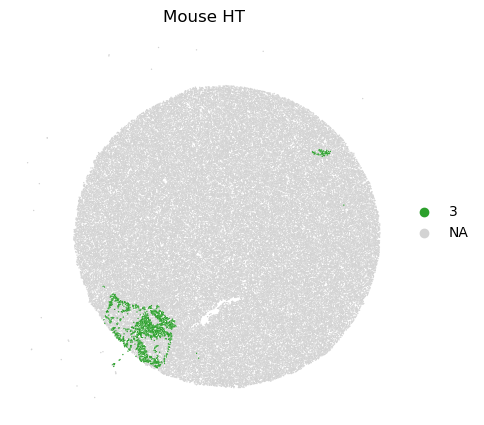

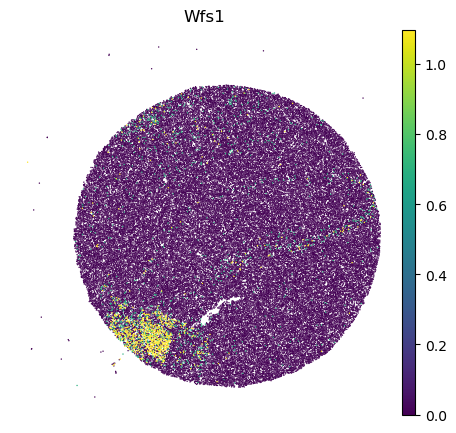

In [40]:
plt.rcParams["figure.figsize"] = (5, 5)
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.02, right=0.82)  # 调整左边缘的边距

# adata_test = adata[adata.obs['domain'] == '10']

sc.pl.embedding(adata, 
                basis="spatial", 
                color=['domain'],
                groups=['3'],
                s=4, 
                show=False, 
                title='Mouse HT',
                # ax=axs[0]
                )
plt.axis('off')

plt.rcParams["figure.figsize"] = (5.5, 5)
# fig.subplots_adjust(left=0.02)  # 调整左边缘的边距
sc.pl.embedding(adata, 
                basis="spatial", 
                color='Nwd2',
                s=4, 
                show=False, 
                title='Wfs1',
                vmax='p99',
                # ax=axs[1]
                )

plt.axis('off')